# Exam 3

For questions 1-3 use the file 2015_CHR_Analytic_Data.csv that is added to this folder. This file needs some cleaning before use (you can use any language for this step R, python etc) (10 points)

1. Besides counties, this csv contains state totals. Such rows should be filtered out when working with the data, so that you only work with county data. 

2. Only counties with at least 30,000 people according to “2011 population estimate Value”.
3. Only columns ending in “Value” (plus the county code). To check, here is the complete list:

    -('COUNTYCODE’, 'Premature death Value', 'Poor or fair health Value', 'Poor physical health days Value', 'Poor mental health days Value', 'Low birthweight Value', 'Adult smoking Value', 'Adult obesity Value', 'Food environment index Value', 'Physical inactivity Value', 'Access to exercise opportunities Value', 'Excessive drinking Value', 'Alcohol-impaired driving deaths Value', 'Sexually transmitted infections Value', 'Teen births Value', 'Uninsured Value', 'Primary care physicians Value', 'Dentists Value', 'Mental health providers Value', 'Preventable hospital stays Value', 'Diabetic screening Value', 'Mammography screening Value', 'High school graduation Value', 'Some college Value', 'Unemployment Value', 'Children in poverty Value', 'Income inequality Value', 'Children in single-parent households Value', 'Social associations Value', 'Violent crime Value', 'Injury deaths Value', 'Air pollution - particulate matter Value', 'Drinking water violations Value', 'Severe housing problems Value', 'Driving alone to work Value', 'Long commute - driving alone Value', '2011 population estimate Value', 'Population that is not proficient in English Value', 'Population living in a rural area Value', 'Diabetes Value', 'HIV prevalence rate Value', 'Premature age-adjusted mortality Value', 'Infant mortality Value', 'Child mortality Value', 'Food insecurity Value', 'Limited access to healthy foods Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Uninsured adults Value', 'Uninsured children Value', 'Health care costs Value', 'Could not see doctor due to cost Value', 'Other primary care providers Value', 'Median household income Value', 'Children eligible for free lunch Value', 'Homicide rate Value')
4. Only counties with non-nan values for each value column. (keep zeros though)

    - Output: print the total number of counties: 
	“1. TOTAL NUMBER OF COUNTIES: 823“

5. Create a new column, ‘log_paamv’ which is the log transform of 'Premature age-adjusted mortality Value'.  This will be the outcome, response variable to predict. 
6. Compare the qqplot between log_paamv and Premature age-adjusted mortality Value, did linearity improved?
7. Predict “log_paamv” (y) using all “Value” variables except REMOVED_COLUMNS (listed below) as your predictors/features (X). use multiple linear regression, to predict “log_paamv”. you must standardize the data.  
    - REMOVED_COLUMNS = ('COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value', 'Premature death Value',  'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Injury deaths Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value',  'Child mortality Value', 'Uninsured Value')


$1.$ Run PCA over all of the predictors from the previous step (all columns of X) and all counties.  (20 points)	
    - a. Produce scree plots, pca plots and biplots for the main principal components, 
    - b. In no more than one paragraph discuss your results
    - c. With the more relevant predictors (you choose how many) run a new multiple linear regression and compare this to the previous linear regression model using the AIC (you can use the anova function - anova(m1, m2) Is there an improvement.
    - d. Run regularized predictions using the principal component regression (i.e. use PCA on X and then linear regression fitting the components to y) and compare it to the models (m1 and m2)

In [94]:
counties = read.csv(file = "2015_CHR_Analytic_Data.csv", header = TRUE,stringsAsFactors=FALSE)
head(counties)
#sapply(counties, class)

STATECODE,COUNTYCODE,State,County,County.that.was.not.ranked,Premature.death.Value,Premature.death.Numerator,Premature.death.Denominator,Premature.death.Lower.Confidence.Interval,Premature.death.Upper.Confidence.Interval,⋯,Children.eligible.for.free.lunch.Value,Children.eligible.for.free.lunch.Numerator,Children.eligible.for.free.lunch.Denominator,Children.eligible.for.free.lunch.Lower.Confidence.Interval,Children.eligible.for.free.lunch.Upper.Confidence.Interval,Homicide.rate.Value,Homicide.rate.Numerator,Homicide.rate.Denominator,Homicide.rate.Lower.Confidence.Interval,Homicide.rate.Upper.Confidence.Interval
1,0,AL,Alabama,NA,"9,508","72,385","13,527,993","9,409","9,607",⋯,0.500,"372,509","744,621",NA,NA,9.1,"2,971","33,176,856",8.8,9.5
1,1,AL,Autauga County,NA,"8,405",754,"157,345","7,554","9,257",⋯,0.383,"3,767","9,825",NA,NA,4.6,17,"376,259",2.7,7.4
1,3,AL,Baldwin County,NA,"7,457","2,460","519,994","7,006","7,908",⋯,0.344,"9,875","28,700",NA,NA,4.3,52,"1,255,425",3.2,5.6
1,5,AL,Barbour County,NA,"8,901",414,"76,718","7,580","10,221",⋯,0.697,"2,661","3,819",NA,NA,NA,,,NA,NA
1,7,AL,Bibb County,NA,"10,729",407,"64,629","9,124","12,334",⋯,0.546,"1,934","3,539",NA,NA,7.8,13,"158,530",4.1,13.3
1,9,AL,Blount County,NA,"8,669",861,"162,346","7,802","9,536",⋯,0.442,"4,373","9,887",NA,NA,4.3,17,"398,992",2.5,6.8


In [95]:
library(dplyr)
"Only counties with at least 30,000 people according to “2011 population estimate Value”."
counties <- filter(counties, X2011.population.estimate.Value >= '30,000')


[1] "Only counties with at least 30,000 people according to “2011 population estimate Value”."

In [96]:
"Besides counties, this csv contains state totals. Such rows should be filtered out when working with the data, so that you only work with county data."

new.counties <- select(counties, COUNTYCODE,ends_with("Value"))
head(new.counties)


[1] "Besides counties, this csv contains state totals. Such rows should be filtered out when working with the data, so that you only work with county data."

COUNTYCODE,Premature.death.Value,Poor.or.fair.health.Value,Poor.physical.health.days.Value,Poor.mental.health.days.Value,Low.birthweight.Value,Adult.smoking.Value,Adult.obesity.Value,Food.environment.index.Value,Physical.inactivity.Value,⋯,Motor.vehicle.crash.deaths.Value,Drug.poisoning.deaths.Value,Uninsured.adults.Value,Uninsured.children.Value,Health.care.costs.Value,Could.not.see.doctor.due.to.cost.Value,Other.primary.care.providers.Value,Median.household.income.Value,Children.eligible.for.free.lunch.Value,Homicide.rate.Value
0,"9,508",0.205,4.3,4.3,0.10,0.219,0.332,6.7,0.294,⋯,20.89,11.47,0.202,0.043,"10,127",0.163,48,"42,882",0.500,9.1
1,"8,405",0.228,5.1,3.6,0.09,0.217,0.313,7.2,0.279,⋯,21.25,8.23,0.169,0.037,"9,939",0.156,18,"51,868",0.383,4.6
9,"8,669",0.242,5.9,3.9,0.08,0.213,0.309,8.5,0.298,⋯,25.57,18.30,0.233,0.059,"10,281",0.173,7,"44,392",0.442,4.3
17,"11,864",0.385,5.0,4.3,0.12,0.241,0.397,5.7,0.353,⋯,28.22,9.96,0.205,0.039,"8,948",0.225,9,"33,883",0.661,9.7
21,"10,911",0.205,4.6,4.9,0.10,0.201,0.370,7.9,0.318,⋯,30.34,18.79,0.245,0.060,"10,168",0.147,2,"41,348",0.533,6.2
31,"8,015",0.184,3.5,3.6,0.09,0.177,0.285,7.1,0.297,⋯,21.26,6.12,0.205,0.049,"9,330",0.145,39,"44,666",0.385,3.5


In [97]:
"Only counties with non-nan values for each value column. (keep zeros though)"
df <- new.counties[complete.cases(new.counties),]
dim(df)
head(df)

[1] "Only counties with non-nan values for each value column. (keep zeros though)"

[1] 518  56

,COUNTYCODE,Premature.death.Value,Poor.or.fair.health.Value,Poor.physical.health.days.Value,Poor.mental.health.days.Value,Low.birthweight.Value,Adult.smoking.Value,Adult.obesity.Value,Food.environment.index.Value,Physical.inactivity.Value,⋯,Motor.vehicle.crash.deaths.Value,Drug.poisoning.deaths.Value,Uninsured.adults.Value,Uninsured.children.Value,Health.care.costs.Value,Could.not.see.doctor.due.to.cost.Value,Other.primary.care.providers.Value,Median.household.income.Value,Children.eligible.for.free.lunch.Value,Homicide.rate.Value
1,0,"9,508",0.205,4.3,4.3,0.10,0.219,0.332,6.7,0.294,⋯,20.89,11.47,0.202,0.043,"10,127",0.163,48,"42,882",0.500,9.1
2,1,"8,405",0.228,5.1,3.6,0.09,0.217,0.313,7.2,0.279,⋯,21.25,8.23,0.169,0.037,"9,939",0.156,18,"51,868",0.383,4.6
3,9,"8,669",0.242,5.9,3.9,0.08,0.213,0.309,8.5,0.298,⋯,25.57,18.30,0.233,0.059,"10,281",0.173,7,"44,392",0.442,4.3
5,21,"10,911",0.205,4.6,4.9,0.10,0.201,0.370,7.9,0.318,⋯,30.34,18.79,0.245,0.060,"10,168",0.147,2,"41,348",0.533,6.2
6,31,"8,015",0.184,3.5,3.6,0.09,0.177,0.285,7.1,0.297,⋯,21.26,6.12,0.205,0.049,"9,330",0.145,39,"44,666",0.385,3.5
7,33,"10,657",0.259,4.4,4.8,0.10,0.296,0.339,7.2,0.319,⋯,19.94,4.98,0.181,0.039,"10,689",0.177,84,"40,032",0.466,5.3


In [98]:
is.na(df$Premature.death.Value)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE

In [80]:
"Create a new column, ‘log_paamv’ which is the log transform of 'Premature age-adjusted mortality Value'. This will be the outcome, response variable to predict. "
df$log_paamv <- log(df$Premature.age.adjusted.mortality.Value)
head(df$log_paamv)

[1] "Create a new column, ‘log_paamv’ which is the log transform of 'Premature age-adjusted mortality Value'. This will be the outcome, response variable to predict. "

ERROR: Error in df$Premature.age.adjusted.mortality.Value: $ operator is invalid for atomic vectors


[1] "Compare the qqplot between log_paamv and Premature age-adjusted mortality Value, did linearity improved?"

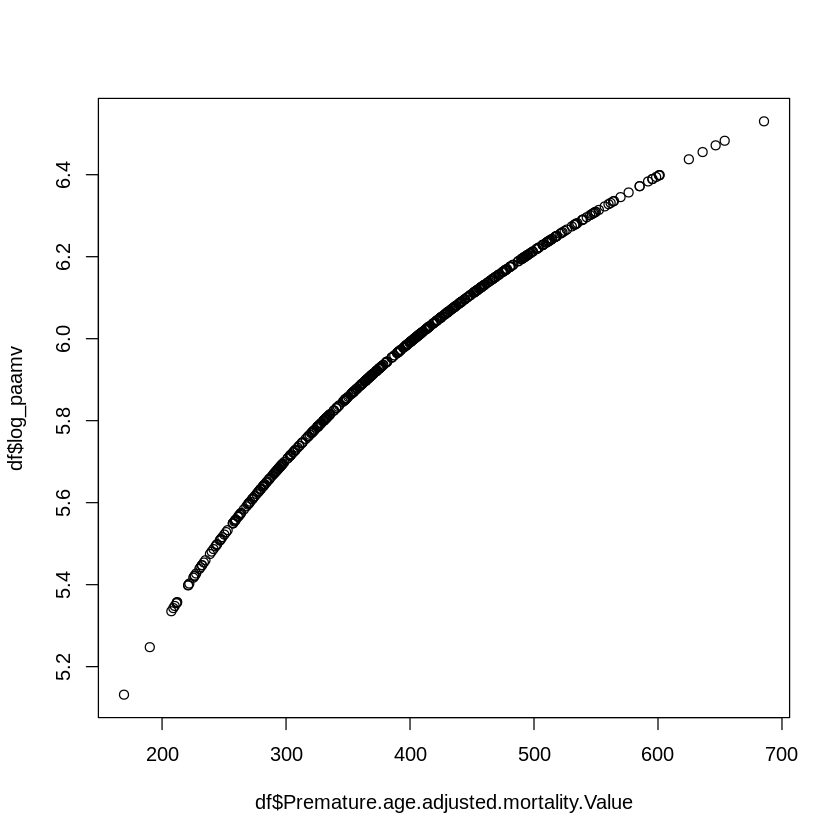

In [7]:
"Compare the qqplot between log_paamv and Premature age-adjusted mortality Value, did linearity improved?"
qqplot(df$Premature.age.adjusted.mortality.Value,df$log_paamv)

In [10]:
"
Predict “log_paamv” (y) using all “Value” variables except REMOVED_COLUMNS (listed below) as your predictors/features (X). 
use multiple linear regression, to predict “log_paamv”. you must standardize the data. 
REMOVED_COLUMNS = ('COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value', 'Premature death Value', 
'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Injury deaths Value', 
'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Child mortality Value', 'Uninsured Value')
"
REMOVED_COLUMNS <- c('COUNTYCODE', 'log_paamv', 'Premature.age-adjusted.mortality.Value', 'Premature.death.Value', 
'Uninsured.adults.Value', 'Teen.births.Value', 'Food.insecurity.Value', 'Injury.deaths.Value', 
'Motor.vehicle.crash.deaths.Value', 'Drug.poisoning.deaths.Value', 'Child.mortality.Value', 'Uninsured.Value')
df2 <- df[,!names(df) %in% REMOVED_COLUMNS]
head(df2)
str(df2)

[1] "\nPredict “log_paamv” (y) using all “Value” variables except REMOVED_COLUMNS (listed below) as your predictors/features (X). \nuse multiple linear regression, to predict “log_paamv”. you must standardize the data. \nREMOVED_COLUMNS = ('COUNTYCODE', 'log_paamv', 'Premature age-adjusted mortality Value', 'Premature death Value', \n'Uninsured adults Value', 'Teen births Value', 'Food insecurity Value', 'Injury deaths Value', \n'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Child mortality Value', 'Uninsured Value')\n"

,Poor.or.fair.health.Value,Poor.physical.health.days.Value,Poor.mental.health.days.Value,Low.birthweight.Value,Adult.smoking.Value,Adult.obesity.Value,Food.environment.index.Value,Physical.inactivity.Value,Access.to.exercise.opportunities.Value,Excessive.drinking.Value,⋯,Premature.age.adjusted.mortality.Value,Infant.mortality.Value,Limited.access.to.healthy.foods.Value,Uninsured.children.Value,Health.care.costs.Value,Could.not.see.doctor.due.to.cost.Value,Other.primary.care.providers.Value,Median.household.income.Value,Children.eligible.for.free.lunch.Value,Homicide.rate.Value
1,0.205,4.3,4.3,0.10,0.219,0.332,6.7,0.294,0.641,0.122,⋯,459.7,9.1,0.077,0.043,"10,127",0.163,48,"42,882",0.500,9.1
2,0.228,5.1,3.6,0.09,0.217,0.313,7.2,0.279,0.737,0.167,⋯,431.9,8.0,0.098,0.037,"9,939",0.156,18,"51,868",0.383,4.6
3,0.242,5.9,3.9,0.08,0.213,0.309,8.5,0.298,0.255,0.055,⋯,430.5,6.3,0.011,0.059,"10,281",0.173,7,"44,392",0.442,4.3
5,0.205,4.6,4.9,0.10,0.201,0.370,7.9,0.318,0.326,0.093,⋯,530.5,9.9,0.017,0.060,"10,168",0.147,2,"41,348",0.533,6.2
6,0.184,3.5,3.6,0.09,0.177,0.285,7.1,0.297,0.708,0.098,⋯,398.4,9.8,0.074,0.049,"9,330",0.145,39,"44,666",0.385,3.5
7,0.259,4.4,4.8,0.10,0.296,0.339,7.2,0.319,0.465,0.074,⋯,493.3,9.1,0.051,0.039,"10,689",0.177,84,"40,032",0.466,5.3


'data.frame':	517 obs. of  46 variables:
 $ Poor.or.fair.health.Value                         : num  0.205 0.228 0.242 0.205 0.184 0.259 0.214 0.212 0.252 0.204 ...
 $ Poor.physical.health.days.Value                   : num  4.3 5.1 5.9 4.6 3.5 4.4 3.9 4.9 3.9 4.7 ...
 $ Poor.mental.health.days.Value                     : num  4.3 3.6 3.9 4.9 3.6 4.8 4.4 3.9 3.6 4.9 ...
 $ Low.birthweight.Value                             : num  0.1 0.09 0.08 0.1 0.09 0.1 0.09 0.09 0.13 0.09 ...
 $ Adult.smoking.Value                               : num  0.219 0.217 0.213 0.201 0.177 0.296 0.22 0.212 0.206 0.18 ...
 $ Adult.obesity.Value                               : num  0.332 0.313 0.309 0.37 0.285 0.339 0.344 0.344 0.417 0.321 ...
 $ Food.environment.index.Value                      : num  6.7 7.2 8.5 7.9 7.1 7.2 7.8 6.4 3.6 7.8 ...
 $ Physical.inactivity.Value                         : num  0.294 0.279 0.298 0.318 0.297 0.319 0.308 0.305 0.332 0.294 ...
 $ Access.to.exercise.opportunities.Value  

In [9]:
apply(df2, 2, var)
scaled_df <- apply(df2, 2, scale)
head(scaled_df)

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”

Poor.or.fair.health.Value 
                                      2.644539e-03 
                   Poor.physical.health.days.Value 
                                      7.383674e-01 
                     Poor.mental.health.days.Value 
                                      6.689405e-01 
                             Low.birthweight.Value 
                                      2.942888e-04 
                               Adult.smoking.Value 
                                      2.720323e-03 
                               Adult.obesity.Value 
                                      2.197037e-03 
                      Food.environment.index.Value 
                                      1.081449e+00 
                         Physical.inactivity.Value 
                                      3.232352e-03 
            Access.to.exercise.opportunities.Value 
                                      3.197593e-02 
                          Excessive.drinking.Value 
                                      1.921980e-03 
             Alcohol.impaired.driving.deaths.Value 
                                      8.769953e-03 
             Sexually.transmitted.infections.Value 
                                                NA 
                     Primary.care.physicians.Value 
                                      8.647791e+02 
                                    Dentists.Value 
                                      5.409266e+02 
                     Mental.health.providers.Value 
                                                NA 
                  Preventable.hospital.stays.Value 
                                      4.339964e+02 
                          Diabetic.screening.Value 
                                      3.235364e-03 
                       Mammography.screening.Value 
                                      3.732644e-03 
                      High.school.graduation.Value 
                                      7.962459e-03 
                                Some.college.Value 
                                      1.081234e-02 
                                Unemployment.Value 
                                      3.962027e-04 
                         Children.in.poverty.Value 
                                      7.357707e-03 
                           Income.inequality.Value 
                                      4.377706e-01 
        Children.in.single.parent.households.Value 
                                      7.734990e-03 
                         Social.associations.Value 
                                      1.277640e+01 
                               Violent.crime.Value 
                                                NA 
          Air.pollution...particulate.matter.Value 
                                      2.057763e+00 
                   Drinking.water.violations.Value 
                                      1.929602e-02 
                     Severe.housing.problems.Value 
                                      1.443156e-03 
                       Driving.alone.to.work.Value 
                                      3.660730e-03 
                Long.commute...driving.alone.Value 
                                      1.191008e-02 
                   X2011.population.estimate.Value 
                                                NA 
Population.that.is.not.proficient.in.English.Value 
                                      8.321471e-04 
           Population.living.in.a.rural.area.Value 
                                      6.146284e-02 
                                    Diabetes.Value 
                                      5.330500e-04 
                         HIV.prevalence.rate.Value 
                                                NA 
            Premature.age.adjusted.mortality.Value 
                                      8.533958e+03 
                            Infant.mortality.Value 
                                      4.263390e+00 
             Limited.access.to.healthy.foods.Value 
                     

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric


$2.$ Using the K-means clustering and hirerarchichal clustering, split the counties by the predictor "Adult obesity Value" in three categories (low, medium and high obesity) and run the a new set of PCA and linear regressions, with the PCA regression values, for each split and explain wheter there is a better fit for the data. (20 points)

$3.$ Compare the distributions between Diabetic screening Value and Physical inactivity Value, are these two distributions similar? (10 points)
1. Use the ks test 
2. Run a correlation test to compare these distributions

$4.$ Consider an example of a clinical trial of a proposed stroke-prevention medication.  Suppose 250 participants are randomly assigned to receive either the new drug or a placebo.  The participants are followed over the course of a 5-year period with the following results: (10 points)

|Group	|Stroke	|n|
|---|---|---|
|new drug|	yes	|12|
|new drug|	no	|108|
|placebo|	yes	|28|
|placebo|	no	|102|

	a.  Place new drug/placebo as rows and stroke y/n as columns, what does n1,1 equal?
	b.  What does E1,1 equal? (E is the expected value)
	c.  What is the appropriate test statistic to use?
	d.  Perform the appropriate test.  
	e.  What is the critical value of the test statistic? 
	f.  What do you conclude? 


$5.$ In unsupervised machine learning one of the main requirements to run any test is that the outcome variable needs to come from a normal distribution (10 points)

a. True

b. False

$6.$ We will consider data from Stanford Heart Transplant Program, reported by Crowley and Hu (1977). The research question was whether receiving a heart transplant affected survival. 
Starting in November of 1967, 103 patients in need of heart transplant were accepted in the program. Sixty-nine of these patients received a transplant. Seventy-five people had an event, while 28 subjects were censored.  For each person in the program we have the date and age at the acceptance to the program, their de-identified ID, transplant status (and time of transplant if transplant was received), if a subject had a prior bypass surgery, survival time, and if the event occurred or if the subject was censored. These data are included as part of the R survival package (dataset named heart). 

Transplant status is an example of a time-varying covariate. Everybody starts as pre-transplant, then some people live to receive a transplant and others die prior to being able to receive one. If two people died at the same time, but one received a transplant 1 year prior to his death, and the other received a transplant 1 day prior to death, we cannot treat them in the same way. We must appropriately attribute a person’s time to either the “pre-transplant” or “post-transplant” period.
The way to deal with this data is to have 2 records for the patients in the study. One for the pre-transplant time, and another one for post-transplant (those subjects who did not get a transplant will only have one record). 

(20 points)

Covariate descriptions:
start, stop, event:	Entry and exit time and status for this interval of time
age:	age-48 years
year:	year of acceptance (in years after 1 Nov 1967)
surgery:	prior bypass surgery 1=yes
transplant:	received transplant 1=yes
id:	patient id

1. Compare the survival curves from people that recieve a transplant vs people that didn't are these two statistically different?
2. Build a multivariable Cox PH model with age, year, prior surgery, and transplant as covariates, but ignore the time-varying nature of transplant. Hint(in the Surv object of the model you only need to specify the "stop", and "event" variables)
    - What is the interpretation of the HR for transplant? 
3. Now build a multivariable Cox PH model with age, year, prior surgery, and transplant as covariates, and take into account the time-varying nature of transplant. Note you need to specify the "start" and "stop" time instead of one single time variable (stop) as you did above (in the Surv object of the model).
    - What is the interpretation of the HR for transplant?
    - Why do you think the results changed after taking into account the time-varying nature of transplant? 

In [ ]:
library(survival)
data(heart)
head(heart)